In [1]:
import pandas as pd

file_path = 'News_Category_Dataset_v3.json'
df = pd.read_json(file_path, lines=True)

df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [2]:
print(df['category'].unique())
print(f'\n{len(df['category'].unique())}','categories')

['U.S. NEWS' 'COMEDY' 'PARENTING' 'WORLD NEWS' 'CULTURE & ARTS' 'TECH'
 'SPORTS' 'ENTERTAINMENT' 'POLITICS' 'WEIRD NEWS' 'ENVIRONMENT'
 'EDUCATION' 'CRIME' 'SCIENCE' 'WELLNESS' 'BUSINESS' 'STYLE & BEAUTY'
 'FOOD & DRINK' 'MEDIA' 'QUEER VOICES' 'HOME & LIVING' 'WOMEN'
 'BLACK VOICES' 'TRAVEL' 'MONEY' 'RELIGION' 'LATINO VOICES' 'IMPACT'
 'WEDDINGS' 'COLLEGE' 'PARENTS' 'ARTS & CULTURE' 'STYLE' 'GREEN' 'TASTE'
 'HEALTHY LIVING' 'THE WORLDPOST' 'GOOD NEWS' 'WORLDPOST' 'FIFTY' 'ARTS'
 'DIVORCE']

42 categories


In [3]:
df.shape

(209527, 6)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

df['text'] = df['headline'] + ' ' + df['short_description']

le = LabelEncoder()
df['category_encoded'] = le.fit_transform(df['category'])

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['category_encoded'], test_size=0.2, random_state=20)

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [5]:
sgd_svm = SGDClassifier(loss='hinge',random_state=20)  # Using linear SVM with hinge loss
sgd_svm.fit(X_train_tfidf, y_train)

SGDClassifier(random_state=20)

In [7]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = sgd_svm.predict(X_test_tfidf)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.5428816875865031
                precision    recall  f1-score   support

          ARTS       0.25      0.09      0.13       303
ARTS & CULTURE       0.14      0.05      0.08       256
  BLACK VOICES       0.44      0.19      0.27       939
      BUSINESS       0.49      0.31      0.38      1207
       COLLEGE       0.42      0.24      0.31       229
        COMEDY       0.48      0.31      0.38      1086
         CRIME       0.48      0.48      0.48       715
CULTURE & ARTS       0.22      0.10      0.14       207
       DIVORCE       0.73      0.67      0.70       682
     EDUCATION       0.34      0.18      0.24       203
 ENTERTAINMENT       0.57      0.69      0.63      3486
   ENVIRONMENT       0.42      0.19      0.26       289
         FIFTY       0.22      0.09      0.12       274
  FOOD & DRINK       0.54      0.69      0.61      1238
     GOOD NEWS       0.23      0.12      0.16       284
         GREEN       0.32      0.14      0.19       525
HEALTHY LIVING    

In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'loss': ['hinge'],  # Using hinge loss for linear SVM
    'penalty': ['l2', 'l1', 'elasticnet'],  # Different regularization types
    'alpha': [1e-4, 1e-3, 1e-2],  # Regularization strength
    'eta0': [0.001, 0.01, 0.1],  # Learning rates
    'max_iter': [1000, 2000, 3000],  # Number of iterations
    'random_state': [20]  # For reproducibility
}

sgd_svm = SGDClassifier()

grid_search = GridSearchCV(estimator=sgd_svm, param_grid=param_grid, 
                           scoring='accuracy', cv=3, n_jobs=-1, verbose=1)

grid_search.fit(X_train_tfidf, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

best_sgd_svm = grid_search.best_estimator_
y_pred = best_sgd_svm.predict(X_test_tfidf)

print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters found:  {'alpha': 0.0001, 'eta0': 0.001, 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'l2', 'random_state': 20}
Best cross-validation score: 0.54
Test Accuracy: 0.5428816875865031
                precision    recall  f1-score   support

          ARTS       0.25      0.09      0.13       303
ARTS & CULTURE       0.14      0.05      0.08       256
  BLACK VOICES       0.44      0.19      0.27       939
      BUSINESS       0.49      0.31      0.38      1207
       COLLEGE       0.42      0.24      0.31       229
        COMEDY       0.48      0.31      0.38      1086
         CRIME       0.48      0.48      0.48       715
CULTURE & ARTS       0.22      0.10      0.14       207
       DIVORCE       0.73      0.67      0.70       682
     EDUCATION       0.34      0.18      0.24       203
 ENTERTAINMENT       0.57      0.69      0.63      3486
   ENVIRONMENT       0.42      0.19      0.26       289
         FIF

In [39]:
from sklearn.pipeline import Pipeline
import numpy as np

# pipeline to combine TfidfVectorizer and SGDClassifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=5000)),
    ('sgd_svm', SGDClassifier(loss='hinge', alpha=0.0001, eta0=0.001, max_iter=1000, penalty='l2', random_state=42))
])

# new parameter grid
# feature engineering to cut out words that appear in less than n articles or more than n
param_grid = {
    'tfidf__min_df': [3, 4, 5, 6, 7],   
    'tfidf__max_df': [0.7, 0.6, 0.65,0.75,0.55]  
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid,
                           scoring='accuracy', cv=3, n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best parameters found:  {'tfidf__max_df': 0.7, 'tfidf__min_df': 5}
Best cross-validation score: 0.54
Test Accuracy: 0.5426430582732783
                precision    recall  f1-score   support

          ARTS       0.25      0.13      0.17       303
ARTS & CULTURE       0.17      0.07      0.10       256
  BLACK VOICES       0.49      0.20      0.29       939
      BUSINESS       0.48      0.30      0.37      1207
       COLLEGE       0.43      0.26      0.32       229
        COMEDY       0.50      0.30      0.38      1086
         CRIME       0.47      0.47      0.47       715
CULTURE & ARTS       0.26      0.10      0.15       207
       DIVORCE       0.71      0.68      0.69       682
     EDUCATION       0.32      0.19      0.24       203
 ENTERTAINMENT       0.57      0.69      0.63      3486
   ENVIRONMENT       0.41      0.17      0.24       289
         FIFTY       0.25      0.10      0.14       274
  FOOD & DRINK     

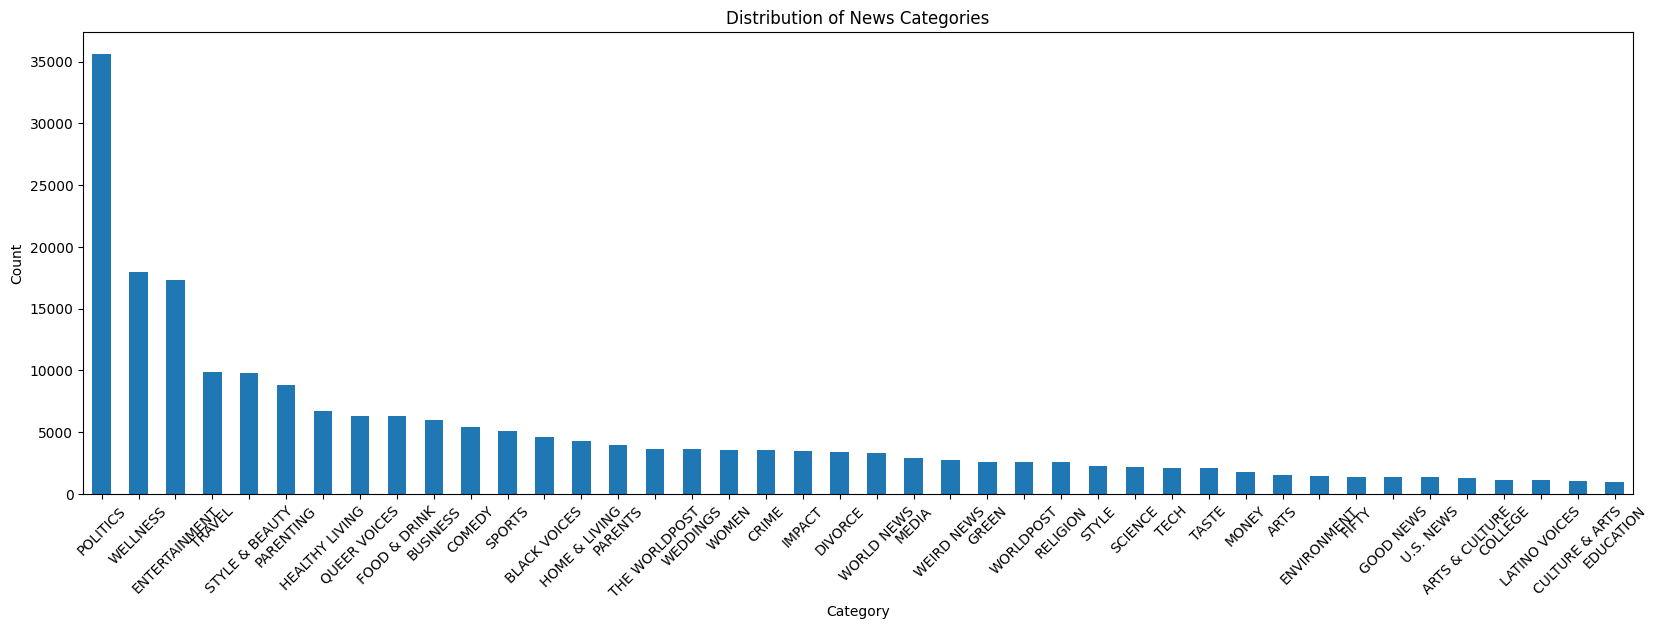

In [43]:
import matplotlib.pyplot as plt

# Count the number of instances per category
category_counts = df['category'].value_counts()

# Plot the distribution
plt.figure(figsize=(20, 6))
category_counts.plot(kind='bar')
plt.title('Distribution of News Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [44]:
# attempt to balance dataset

from sklearn.utils import resample

# Identify the maximum class size
max_size = category_counts.max()

# Create a new DataFrame for the balanced dataset
df_balanced_oversampled = pd.DataFrame()

# Loop through each category and oversample
for category in category_counts.index:
    df_category = df[df['category'] == category]
    df_category_oversampled = resample(df_category, 
                                       replace=True,  # Sample with replacement
                                       n_samples=max_size,  # To match the largest class
                                       random_state=42)  # Reproducible results
    df_balanced_oversampled = pd.concat([df_balanced_oversampled, df_category_oversampled])

# Check new class distribution
print(df_balanced_oversampled['category'].value_counts())


category
POLITICS          35602
MONEY             35602
WEIRD NEWS        35602
GREEN             35602
WORLDPOST         35602
RELIGION          35602
STYLE             35602
SCIENCE           35602
TECH              35602
TASTE             35602
ARTS              35602
WELLNESS          35602
ENVIRONMENT       35602
FIFTY             35602
GOOD NEWS         35602
U.S. NEWS         35602
ARTS & CULTURE    35602
COLLEGE           35602
LATINO VOICES     35602
CULTURE & ARTS    35602
MEDIA             35602
WORLD NEWS        35602
DIVORCE           35602
IMPACT            35602
ENTERTAINMENT     35602
TRAVEL            35602
STYLE & BEAUTY    35602
PARENTING         35602
HEALTHY LIVING    35602
QUEER VOICES      35602
FOOD & DRINK      35602
BUSINESS          35602
COMEDY            35602
SPORTS            35602
BLACK VOICES      35602
HOME & LIVING     35602
PARENTS           35602
THE WORLDPOST     35602
WEDDINGS          35602
WOMEN             35602
CRIME             35602
EDUCATI

In [48]:
print(df_balanced_oversampled.shape)
df_balanced_oversampled.head()

(1495284, 8)


,link,headline,category,short_description,authors,date,text,category_encoded
44986,https://www.huffingtonpost.com/entry/poll-foss...,Two-Thirds Of Americans Disagree With Trump's ...,POLITICS,"The president promises to boost oil and coal, ...",Hayley Miller,2017-01-24,Two-Thirds Of Americans Disagree With Trump's ...,24
2630,https://www.huffpost.com/entry/meidas-touch-ri...,GOP Accused Of Betraying America In Progressiv...,POLITICS,MeidasTouch's #GOPBetrayedAmerica spot calls o...,Lee Moran,2021-05-29,GOP Accused Of Betraying America In Progressiv...,24
32573,https://www.huffingtonpost.com/entry/eating-th...,Eating The Children,POLITICS,Cross-posted from TomDispatch.com In her first...,"Tom Engelhardt, ContributorEditor, TomDispatch...",2017-06-15,Eating The Children Cross-posted from TomDispa...,24
18226,https://www.huffingtonpost.com/entry/overburde...,Overburdened Mental Health Providers Thwart Po...,POLITICS,“I’d tried to quit on my own many times but it...,"Stateline, ContributorStateline provides daily...",2017-12-14,Overburdened Mental Health Providers Thwart Po...,24
48419,https://www.huffingtonpost.com/entry/steven-mn...,"Steven Mnuchin Worked At Goldman Sachs, But Yo...",POLITICS,How weird.,Ben Walsh,2016-12-16,"Steven Mnuchin Worked At Goldman Sachs, But Yo...",24


In [49]:
df_balanced_oversampled['text'] = df_balanced_oversampled['headline'] + ' ' + df_balanced_oversampled['short_description']

le = LabelEncoder()
df_balanced_oversampled['category_encoded'] = le.fit_transform(df_balanced_oversampled['category'])

X_train, X_test, y_train, y_test = train_test_split(df_balanced_oversampled['text'], df_balanced_oversampled['category_encoded'], test_size=0.2, random_state=20)

In [52]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
sgd_svm = SGDClassifier(loss='hinge', alpha=0.0001, eta0=0.001, max_iter=1000, penalty='l2', random_state=20)
sgd_svm.fit(X_train_tfidf, y_train)
y_pred = sgd_svm.predict(X_test_tfidf)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.5972874736254292
                precision    recall  f1-score   support

          ARTS       0.65      0.59      0.62      7085
ARTS & CULTURE       0.69      0.67      0.68      7239
  BLACK VOICES       0.58      0.45      0.51      7066
      BUSINESS       0.53      0.35      0.42      7020
       COLLEGE       0.60      0.78      0.68      7211
        COMEDY       0.56      0.49      0.52      7090
         CRIME       0.58      0.70      0.63      6990
CULTURE & ARTS       0.68      0.76      0.72      7147
       DIVORCE       0.74      0.82      0.78      7176
     EDUCATION       0.59      0.79      0.68      7022
 ENTERTAINMENT       0.35      0.21      0.26      7176
   ENVIRONMENT       0.61      0.68      0.65      7114
         FIFTY       0.60      0.65      0.62      7104
  FOOD & DRINK       0.58      0.60      0.59      7202
     GOOD NEWS       0.64      0.65      0.64      7078
         GREEN       0.64      0.52      0.57      7215
HEALTHY LIVING    

In [53]:
# testing on real data set

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['category_encoded'], test_size=0.2, random_state=20)
X_test_tfidf = vectorizer.transform(X_test)
y_pred = sgd_svm.predict(X_test_tfidf)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.5030544552092779
                precision    recall  f1-score   support

          ARTS       0.34      0.58      0.43       303
ARTS & CULTURE       0.31      0.64      0.42       256
  BLACK VOICES       0.47      0.48      0.47       939
      BUSINESS       0.53      0.33      0.41      1207
       COLLEGE       0.24      0.78      0.37       229
        COMEDY       0.47      0.51      0.49      1086
         CRIME       0.45      0.67      0.54       715
CULTURE & ARTS       0.31      0.76      0.44       207
       DIVORCE       0.58      0.82      0.68       682
     EDUCATION       0.19      0.75      0.30       203
 ENTERTAINMENT       0.69      0.20      0.31      3486
   ENVIRONMENT       0.31      0.66      0.42       289
         FIFTY       0.23      0.66      0.34       274
  FOOD & DRINK       0.63      0.59      0.61      1238
     GOOD NEWS       0.31      0.64      0.42       284
         GREEN       0.44      0.53      0.48       525
HEALTHY LIVING    